# Support Vector Machines

## SVM Lineal

Generamos los datos

<IPython.core.display.Javascript object>


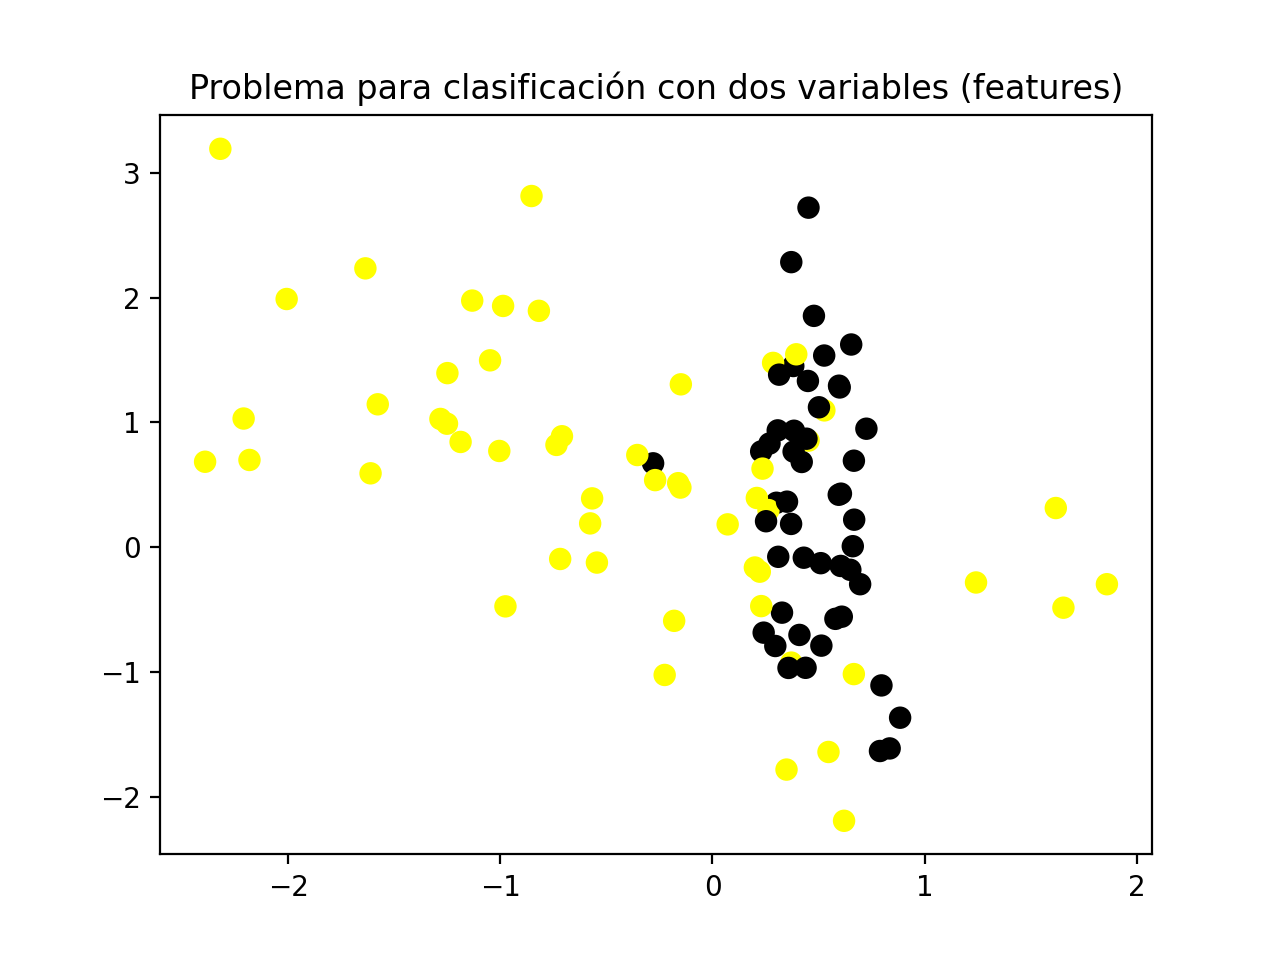

In [1]:
from sklearn.datasets import make_classification, make_blobs
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Problema para clasificación con dos variables (features)')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

#### Clasificador SVM lineal

<IPython.core.display.Javascript object>


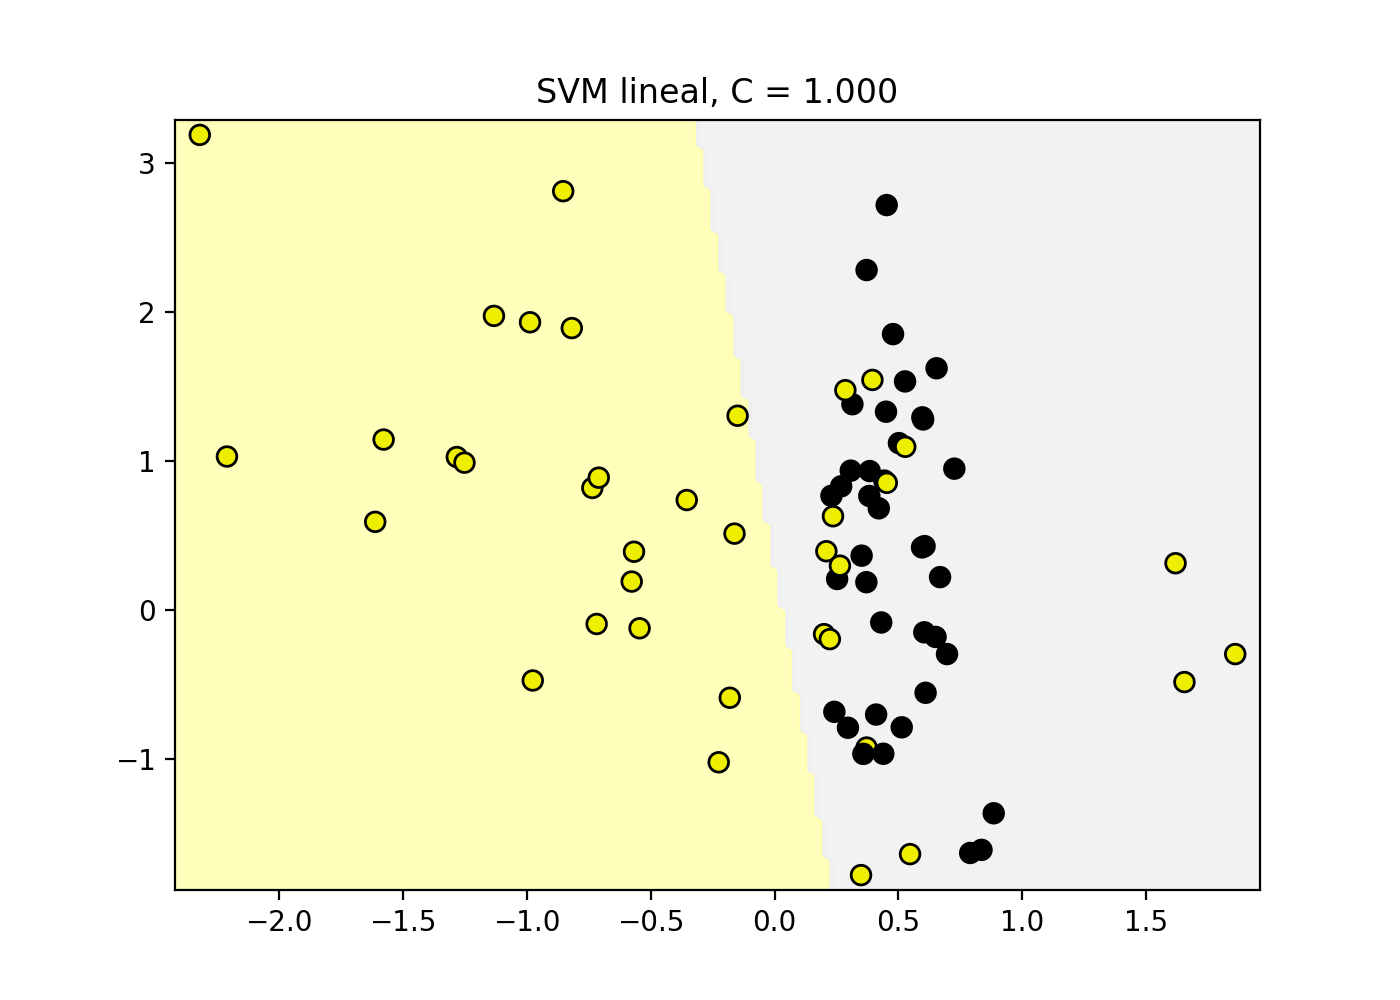

In [3]:
from sklearn.svm import SVC
from shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'SVM lineal, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Clasificador SVM lineal: parámetro C

<IPython.core.display.Javascript object>


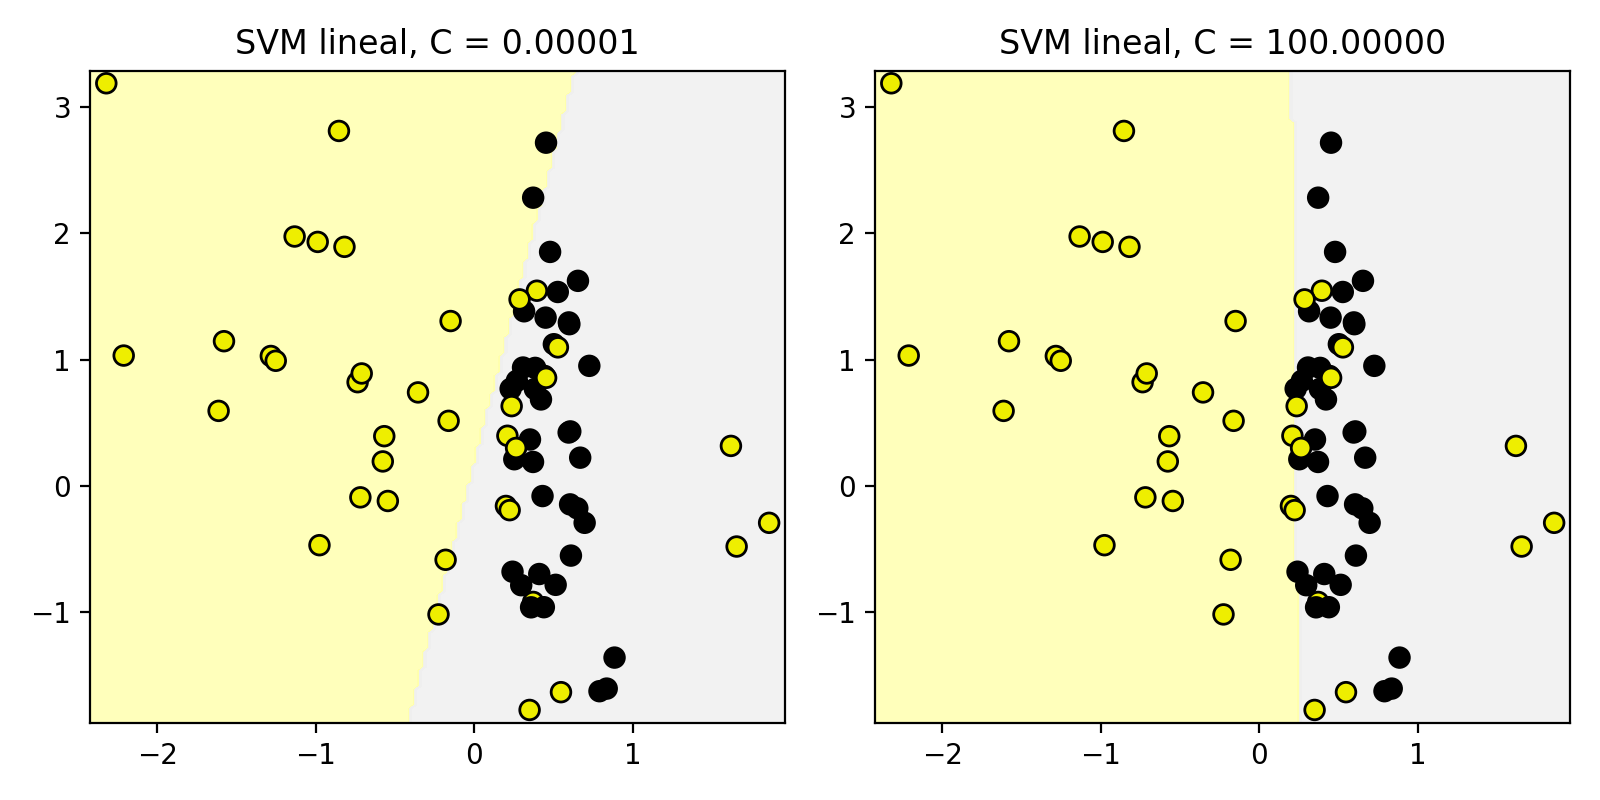

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [4]:
from sklearn.svm import LinearSVC
from shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'SVM lineal, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Aplicación

In [5]:
from sklearn.datasets import load_breast_cancer
# Breast cancer dataset para clasificación
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Datos de cáncer de mama')
print('Precisión de SVM lineal en el conjunto de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión de SVM lineal en el conjunto de prueba: {:.2f}'
     .format(clf.score(X_test, y_test)))

Datos de cáncer de mama
Precisión de SVM lineal en el conjunto de entrenamiento: 0.93
Precisión de SVM lineal en el conjunto de prueba: 0.94


/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### SVM con Kernels

In [6]:
# Conjunto de datos no separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

<IPython.core.display.Javascript object>


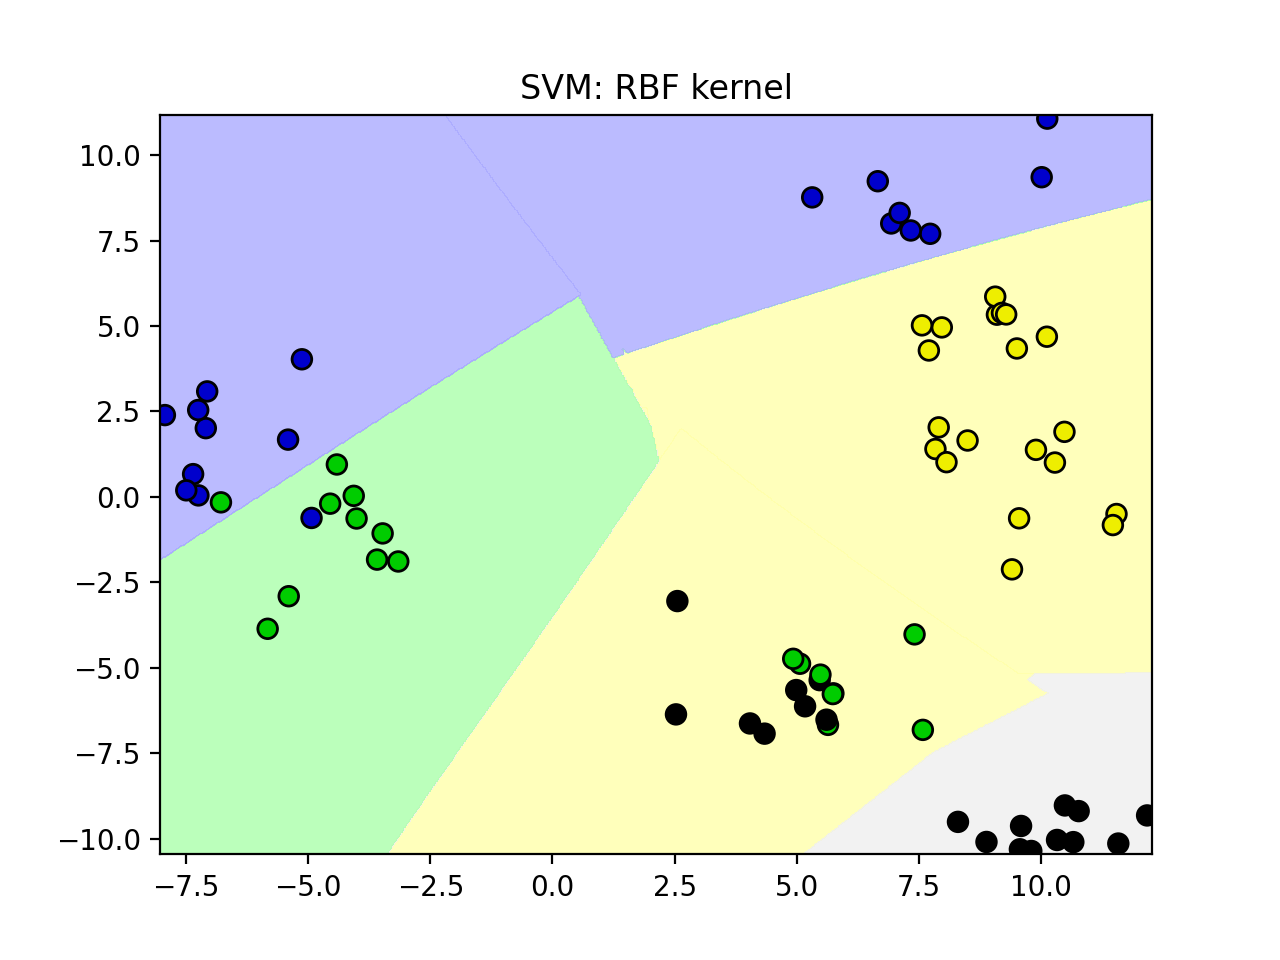

<IPython.core.display.Javascript object>


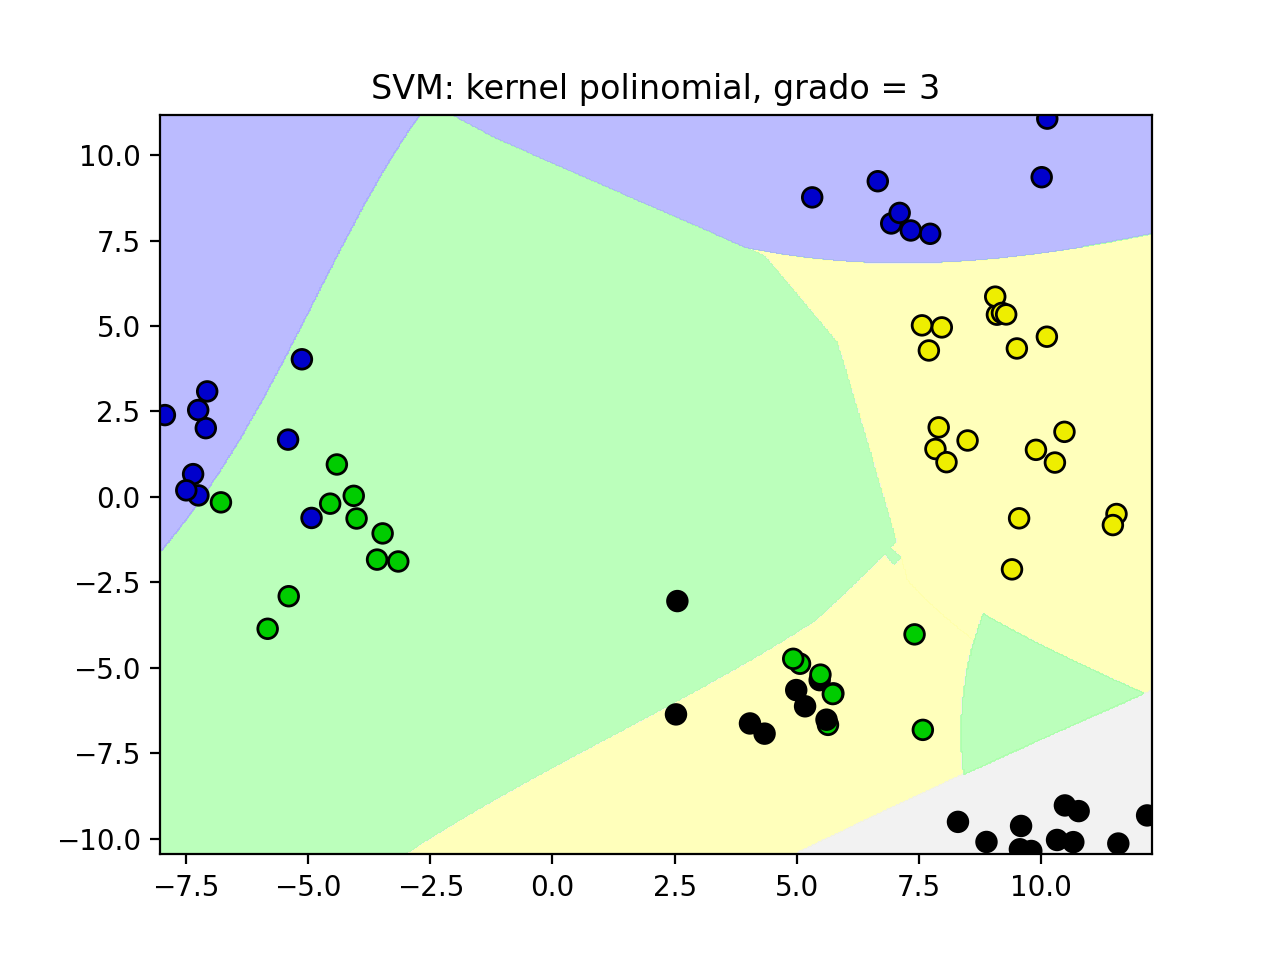

In [7]:
from sklearn.svm import SVC
from shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# El kernel por defecto es radial(RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'SVM: RBF kernel')

# Comparamos las regiones de decisión con un kernel polinomial, grado = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'SVM: kernel polinomial, grado = 3')

#### SVM: el parámetros gamma

<IPython.core.display.Javascript object>


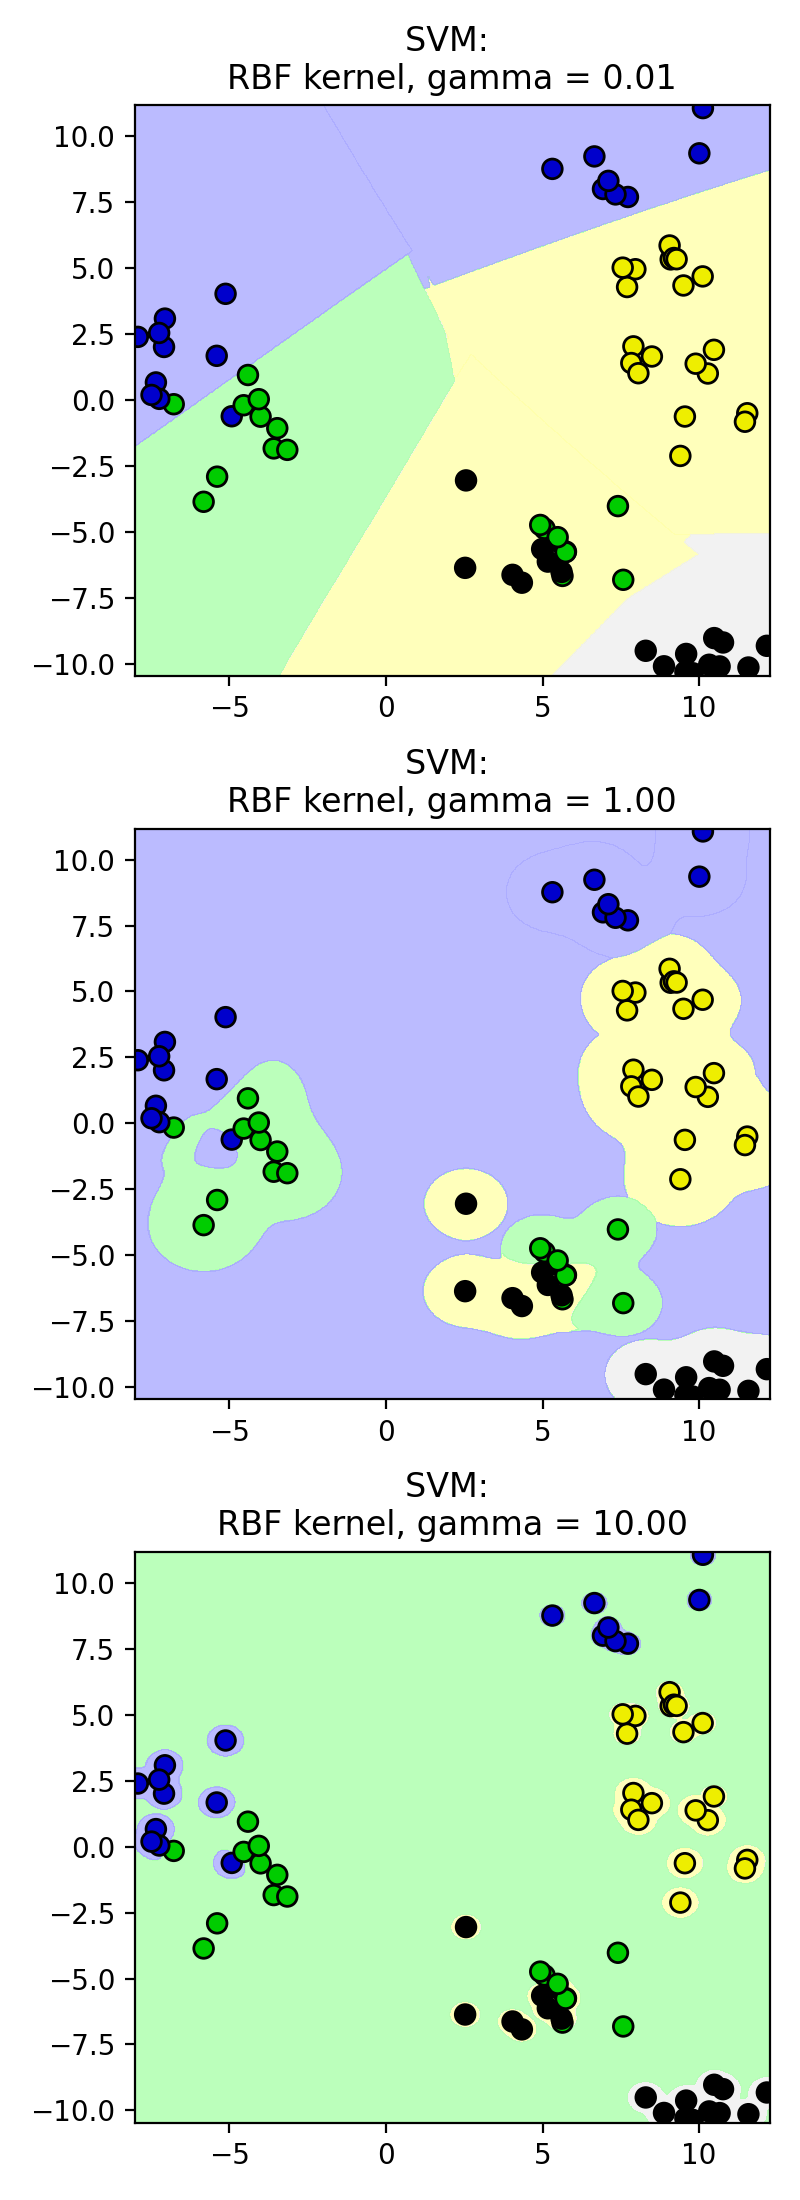

In [10]:
from shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'SVM: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### SVM: escenarios para C y gamma

<IPython.core.display.Javascript object>


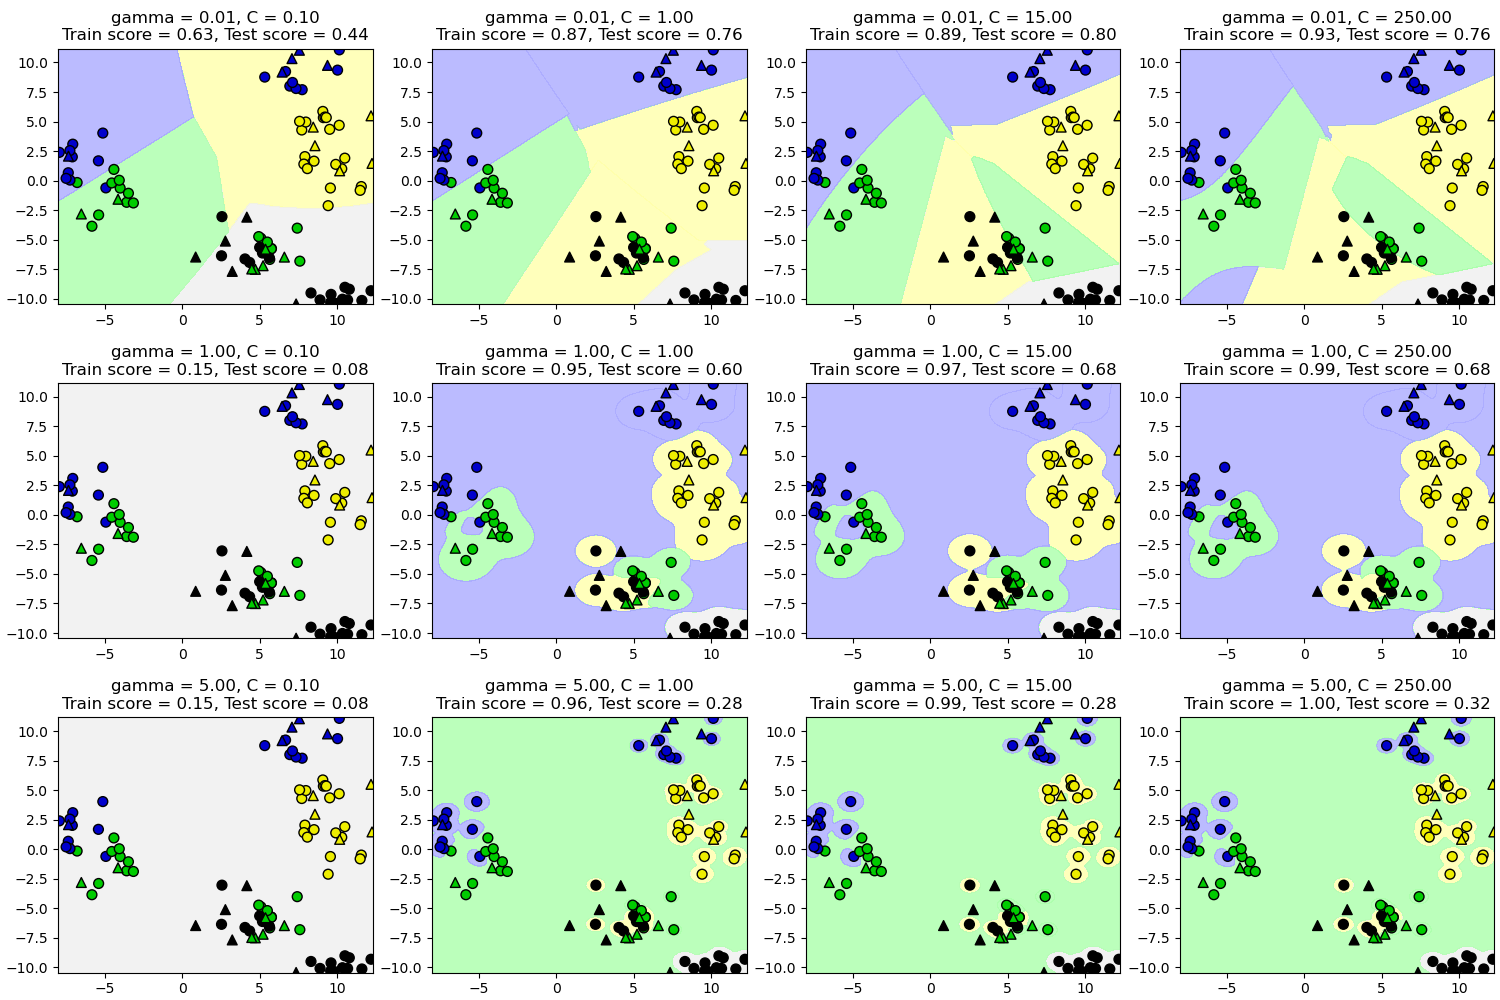

In [9]:
from sklearn.svm import SVC
from shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

#### Aplicación (datos no normalizados)

In [12]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Datos de cáncer de mama (sin normalizar)')
print('Precisión de SVM con kernel RBF en los datos de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión de SVM con kernel RBF en los datos de prueba: {:.2f}'
     .format(clf.score(X_test, y_test)))

Datos de cáncer de mama (sin normalizar)
Precisión de SVM con kernel RBF en los datos de entrenamiento: 0.92
Precisión de SVM con kernel RBF en los datos de prueba: 0.94


#### Aplicación (datos normalizados)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Datos de cáncer de mama (normalizado con MinMax scaling)')
print('Precisión, RBF-kernel SVM (with MinMax scaling) entrenamiento: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Precisión, RBF-kernel SVC (with MinMax scaling) prueba: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Datos de cáncer de mama (normalizado con MinMax scaling)
Precisión, RBF-kernel SVM (with MinMax scaling) entrenamiento: 0.99
Precisión, RBF-kernel SVC (with MinMax scaling) prueba: 0.97


# Redes Neuronales

## Funciones de activación

<IPython.core.display.Javascript object>


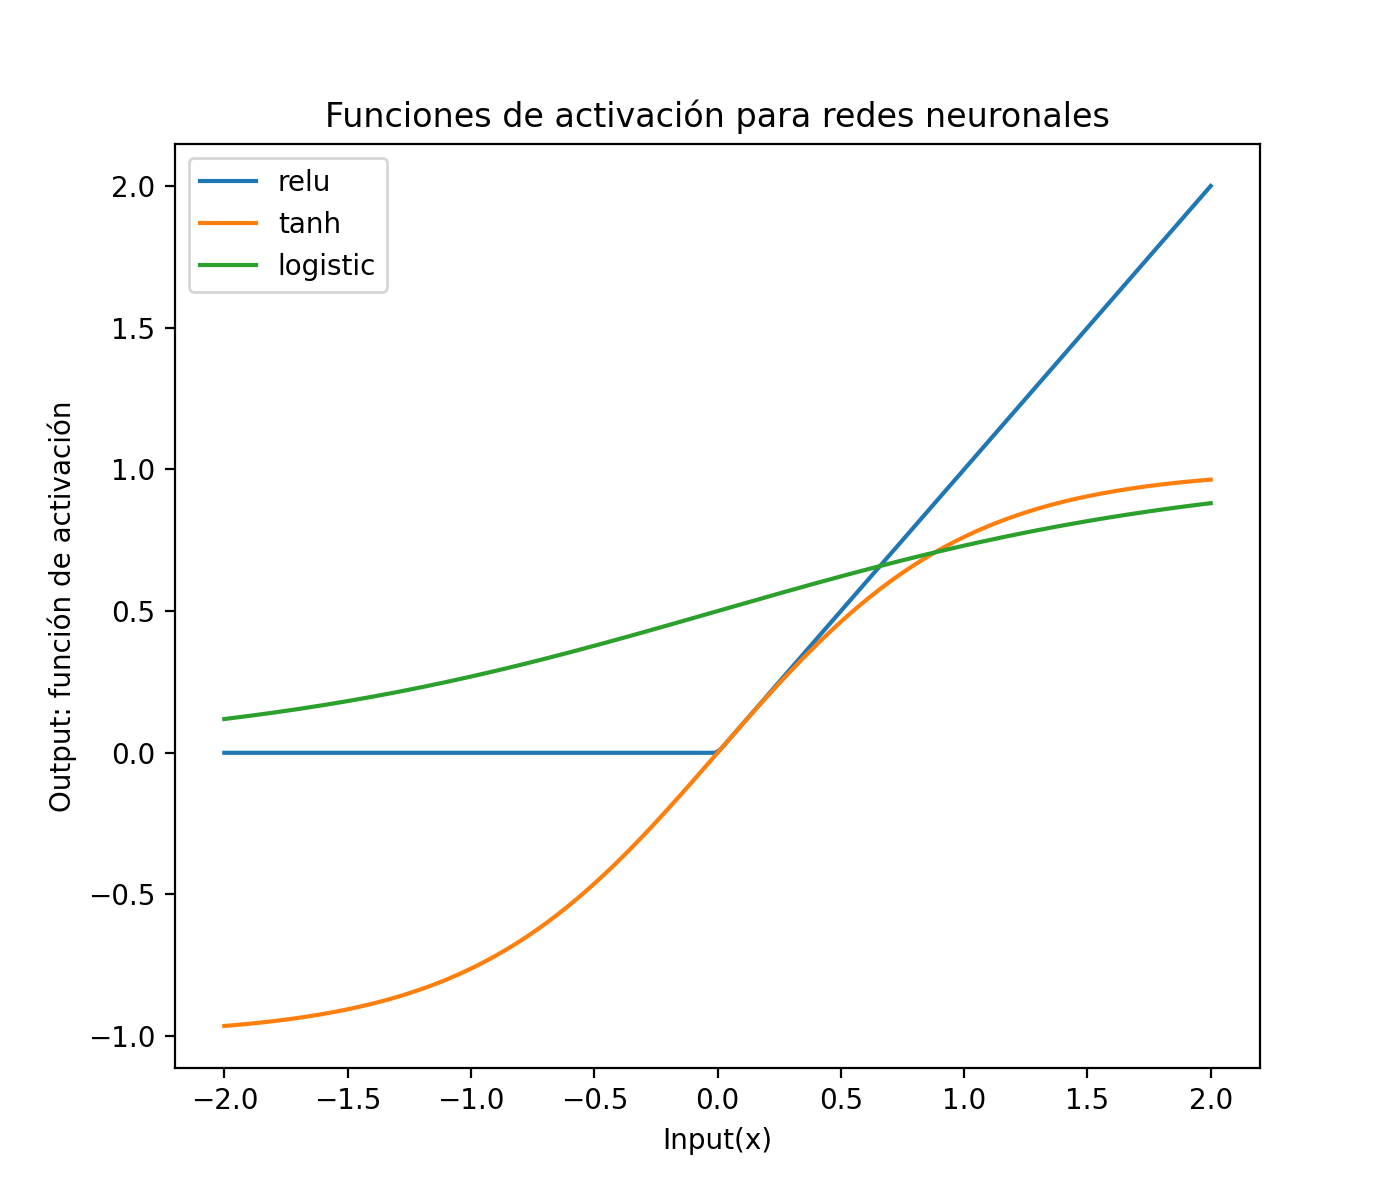

In [14]:
import numpy as np
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Funciones de activación para redes neuronales')
plt.xlabel('Input(x)')
plt.ylabel('Output: función de activación')

plt.show()

### Una capa oculta

<IPython.core.display.Javascript object>


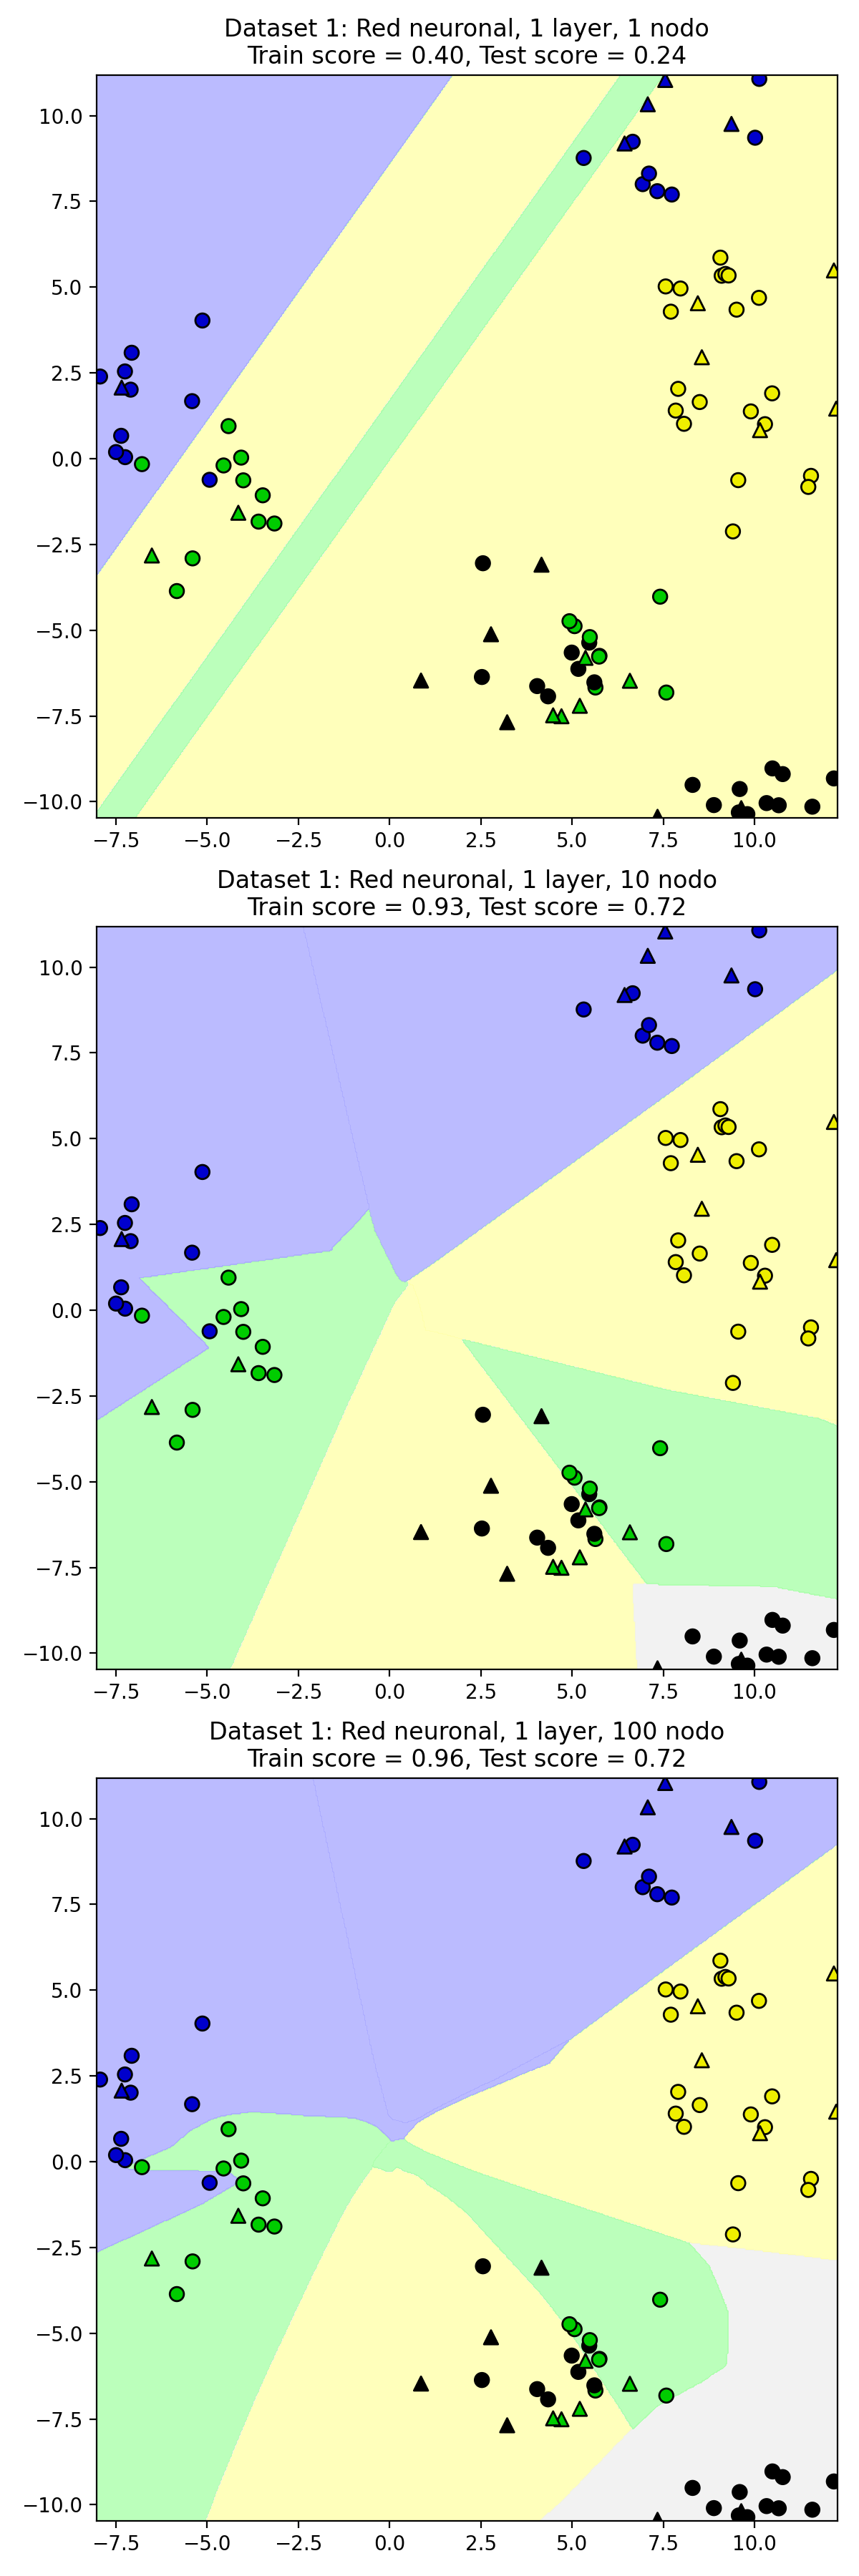

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [15]:
from sklearn.neural_network import MLPClassifier
from shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Red neuronal, 1 layer, {} nodo'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Dos capas ocultas

<IPython.core.display.Javascript object>


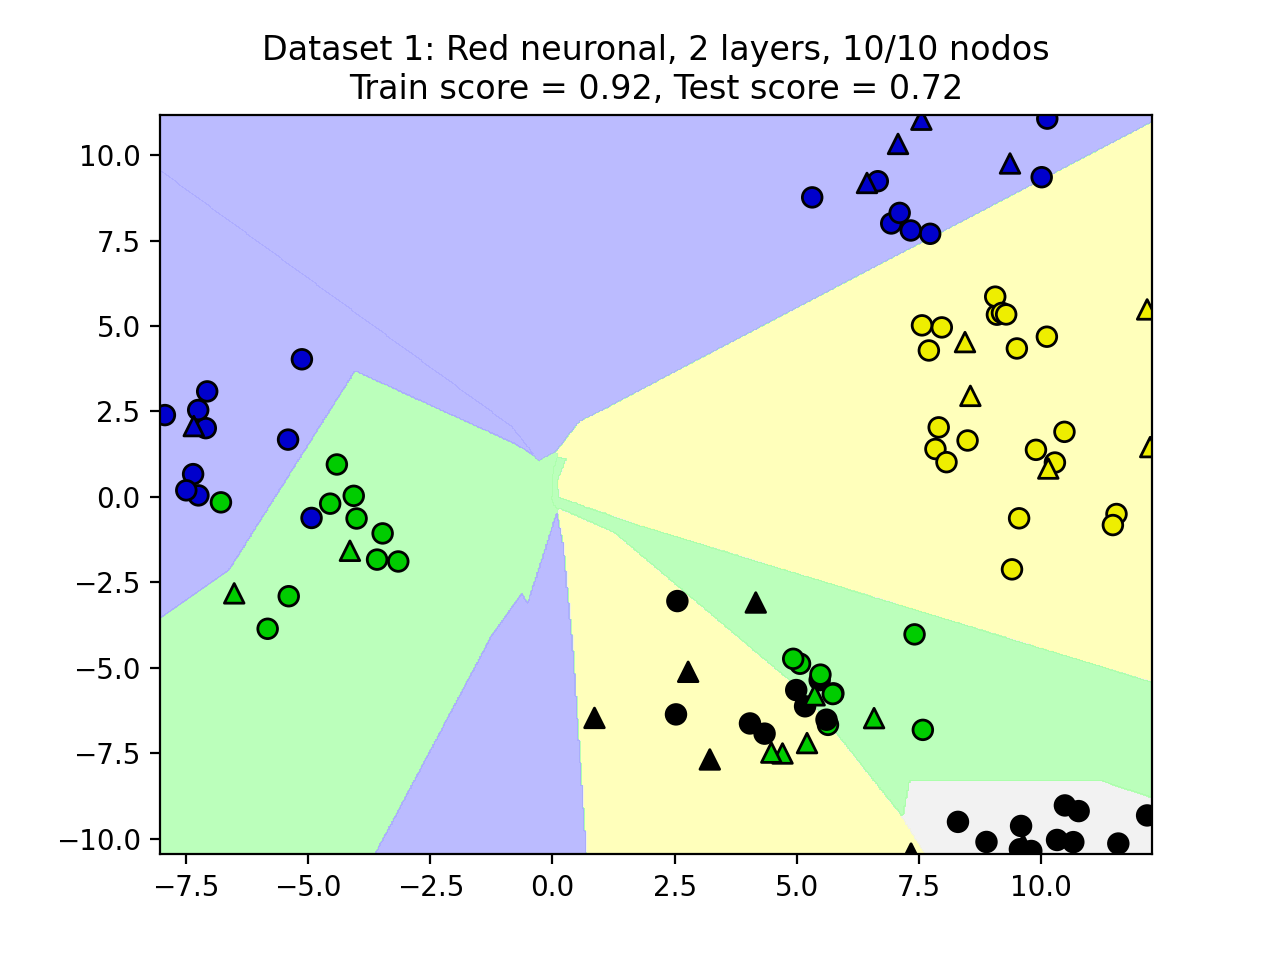

In [16]:
from shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Red neuronal, 2 layers, 10/10 nodos')



### Parámetro de regularización: alpha

<IPython.core.display.Javascript object>


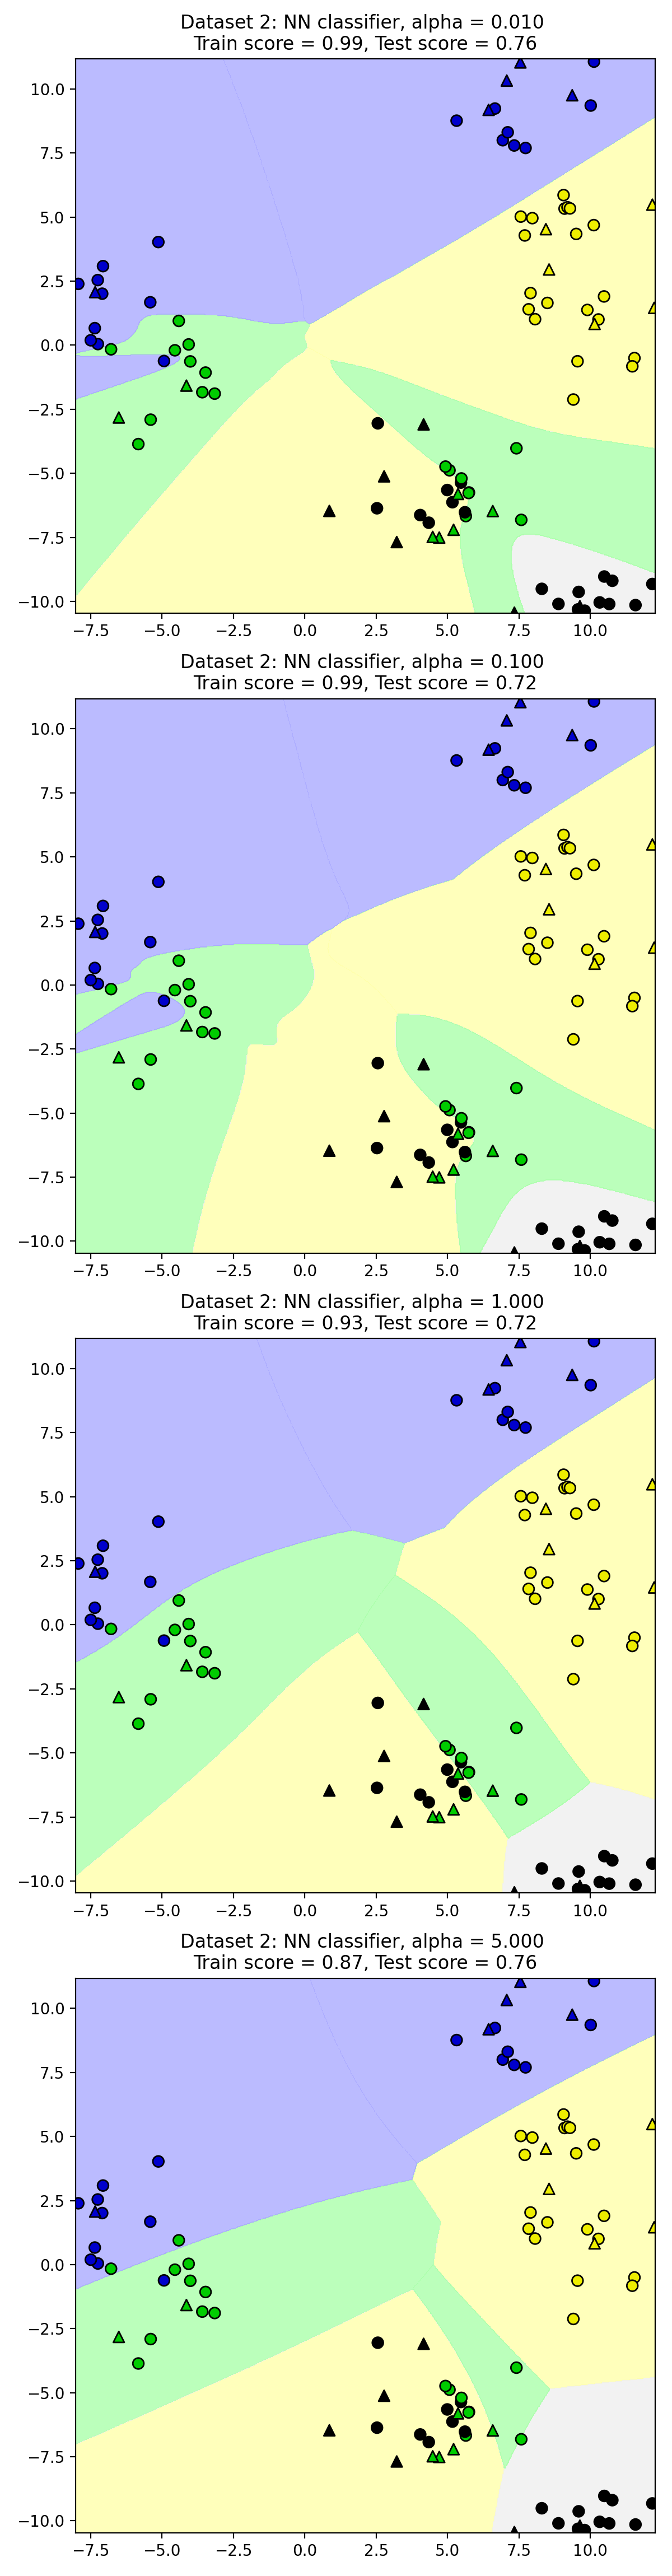

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Aplicación

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Datos de cáncer de mama')
print('Precisión de NN en los datos de entrenamiento: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Precisión de NN en los datos de prueba: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Datos de cáncer de mama
Precisión de NN en los datos de entrenamiento: 0.98
Precisión de NN en los datos de prueba: 0.97
